
🇬🇧 **Use Case:** This code is used for **outlier detection**. The Isolation Forest algorithm is particularly effective at identifying anomalies in data. In this specific example, it's applied to a 2D dataset arranged in a spiral shape to find data points that do not conform to the typical pattern.

---

🇧🇷 **Caso de Uso:** Este código é usado para **detecção de outliers**. O algoritmo Isolation Forest é particularmente eficaz na identificação de anomalias em dados. Neste exemplo específico, ele é aplicado a um conjunto de dados 2D organizado em formato de espiral para encontrar pontos de dados que não seN conformam ao padrão típico.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [87]:
# Import necessary libraries
# Importar bibliotecas necessárias
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Although imported, seaborn is not used in this specific code snippet.
# Embora importado, o seaborn não é usado neste trecho de código específico.
import seaborn as sn

In [88]:
# Load the dataset from the CSV file
# Carregar o conjunto de dados do arquivo CSV
df = pd.read_csv('spirals.csv')

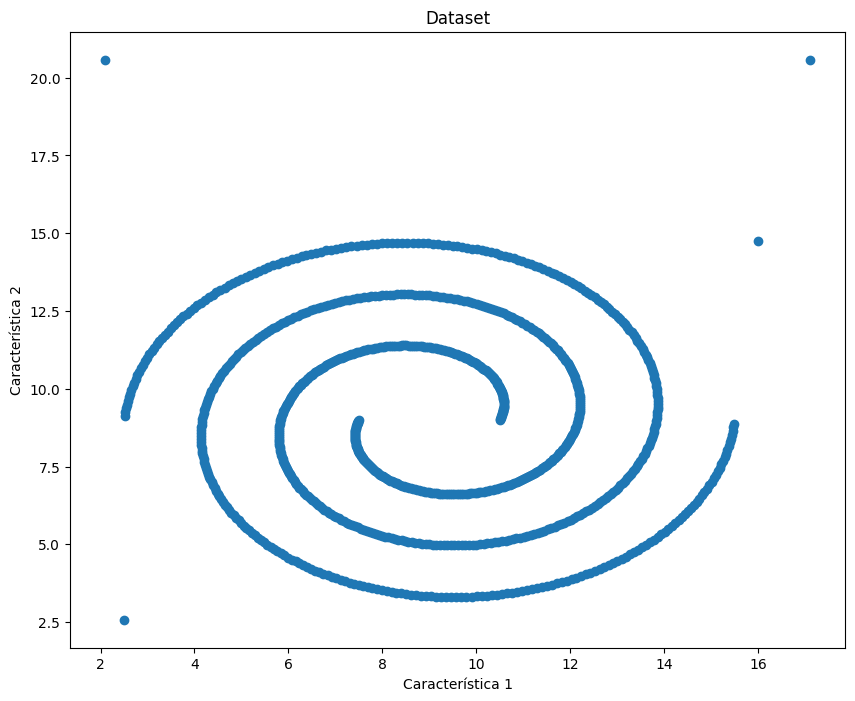

In [91]:
# Visualize the dataset
# Visualizar o conjunto de dados
plt.figure(figsize=(10, 8))
plt.scatter(df['d1'], df['d2'])
plt.title('Dataset')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

In [97]:
# 'contamination' estima a proporção de outliers
model = IsolationForest(contamination = 0.003)
model.fit(df)
outliers = model.predict(df)


# -1 representa um outlier e 1 um ponto normal
outlier = np.sum(outliers == -1 ) # soma outliers
normal = np.sum(outliers == 1 ) # soma não outliers

print('Normais = %d \nOutliers = %d' %(normal, outlier))

# Remove the hardcoded values which are redundant
# Remover os valores hardcoded que são redundantes
# Normais = 1000
# Outliers = 4

#outliers = pd.DataFrame(outliers)
df['Outliers'] = outliers
df1 = df[df['Outliers' ] == -1]
df1

Normais = 1000 
Outliers = 4


,d1,d2,Outliers
442,2.54034,9.365675,-1
1001,2.50000,2.575577,-1
1002,17.10000,20.575577,-1
1003,2.10000,20.575577,-1


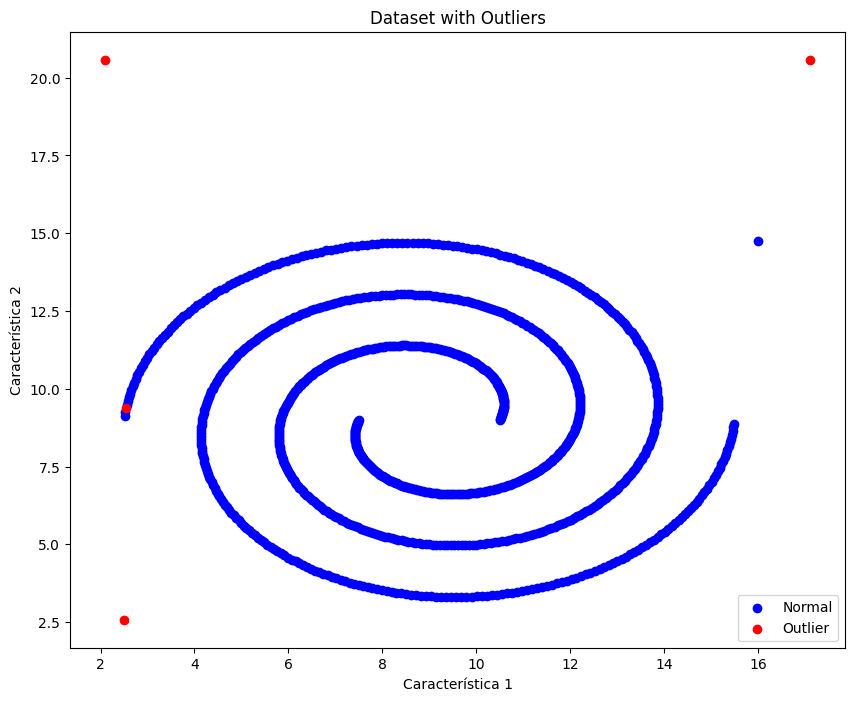

In [98]:
# Visualize the dataset with outliers highlighted
# Visualizar o conjunto de dados com outliers destacados
plt.figure(figsize=(10, 8))

# Plot normal points in blue
# Plotar pontos normais em azul
plt.scatter(df[df['Outliers'] == 1]['d1'], df[df['Outliers'] == 1]['d2'], color='blue', label='Normal')

# Plot outliers in red
# Plotar outliers em vermelho
plt.scatter(df[df['Outliers'] == -1]['d1'], df[df['Outliers'] == -1]['d2'], color='red', label='Outlier')

plt.title('Dataset with Outliers') # Title of the plot
# Título do gráfico
plt.xlabel('Característica 1') # Label for the x-axis
# Rótulo para o eixo x
plt.ylabel('Característica 2') # Label for the y-axis
# Rótulo para o eixo y
plt.legend() # Show legend
# Mostrar legenda
plt.show()

In [105]:
# Initialize and train the Isolation Forest model with a different contamination value
# Inicializar e treinar o modelo Isolation Forest com um valor de contaminação diferente
# 'contamination' estimates the proportion of outliers
# 'contamination' estima a proporção de outliers
model = IsolationForest(contamination=0.01) # Changed contamination value to 0.01
# Valor de contaminação alterado para 0.01
model.fit(df)

# Predict outliers in the dataset
# Prever outliers no conjunto de dados
outliers = model.predict(df)

# Add the outlier prediction results to the DataFrame
# Adicionar os resultados da previsão de outlier ao DataFrame
df['Outliers'] = outliers

# Count the number of normal points and outliers
# Contar o número de pontos normais e outliers
# -1 represents an outlier and 1 a normal point
# -1 representa um outlier e 1 um ponto normal
outlier_count = np.sum(outliers == -1) # sum of outliers

# soma outliers
normal_count = np.sum(outliers == 1) # sum of normal points
# soma pontos normais

print('Normais = %d \noutliers = %d' %(normal_count, outlier_count))


Normais = 993 
outliers = 11


In [109]:
# Add the outlier prediction results to the DataFrame
# Adicionar os resultados da previsão de outlier ao DataFrame
df['Outliers'] = outliers

# Filter the DataFrame to show only the identified outliers
# Filtrar o DataFrame para mostrar apenas os outliers identificados
df1 = df[df['Outliers'] == -1]
df1


,d1,d2,Outliers
441,2.55835,9.486611,-1
442,2.54034,9.365675,-1
443,2.52460,9.244232,-1
446,2.51115,9.122326,-1
500,15.48885,8.877674,-1
998,15.45966,8.634325,-1
999,15.47540,8.755768,-1
1000,16.00000,14.755768,-1
1001,2.50000,2.575577,-1
1002,17.10000,20.575577,-1


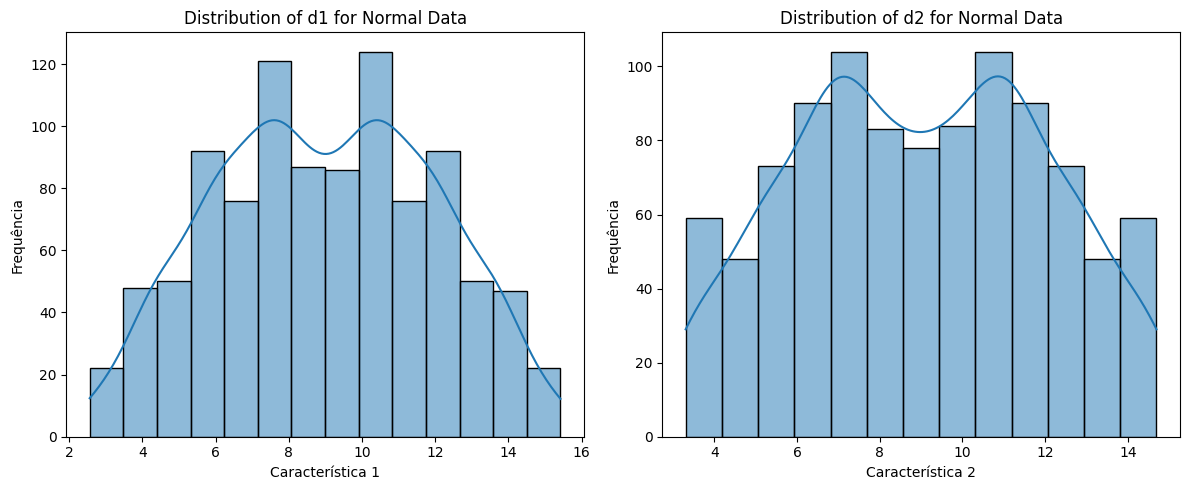

In [110]:
# Visualize the distribution of 'd1' and 'd2' for normal data points
# Visualizar a distribuição de 'd1' e 'd2' para pontos de dados normais

plt.figure(figsize=(12, 5))

# Histogram for 'd1' in normal data points
# Histograma para 'd1' em pontos de dados normais
plt.subplot(1, 2, 1) # Create a subplot
# Criar um subplot
sn.histplot(df_normal['d1'], kde=True)
plt.title('Distribution of d1 for Normal Data') # Title for the d1 histogram
# Título para o histograma de d1
plt.xlabel('Característica 1') # Label for the x-axis
# Rótulo para o eixo x
plt.ylabel('Frequência') # Label for the y-axis
# Rótulo para o eixo y


# Histogram for 'd2' in normal data points
# Histograma para 'd2' em pontos de dados normais
plt.subplot(1, 2, 2) # Create a subplot
# Criar um subplot
sn.histplot(df_normal['d2'], kde=True)
plt.title('Distribution of d2 for Normal Data') # Title for the d2 histogram
# Título para o histograma de d2
plt.xlabel('Característica 2') # Label for the x-axis
# Rótulo para o eixo x
plt.ylabel('Frequência') # Label for the y-axis
# Rótulo para o eixo y


plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
# Ajustar layout para evitar sobreposição de títulos/rótulos
plt.show()


 The cell below creates a new DataFrame 'df_normal' containing only the data points identified as normal (Outliers == 1).

A célula Abaixo cria um novo DataFrame 'df_normal' contendo apenas os pontos de dados identificados como normais (Outliers == 1).

In [111]:
# Filter the DataFrame to show only the identified normal data points
# Filtrar o DataFrame para mostrar apenas os pontos de dados normais identificados
df_normal = df[df['Outliers'] == 1]

# Display the DataFrame containing only the normal data points (optional)
# Exibir o DataFrame contendo apenas os pontos de dados normais (opcional)
display(df_normal.head())





,d1,d2,Outliers
0,10.500000,9.000000,1
1,10.567170,9.268445,1
2,8.275320,11.382210,1
3,8.227458,11.377640,1
4,8.179511,11.372110,1


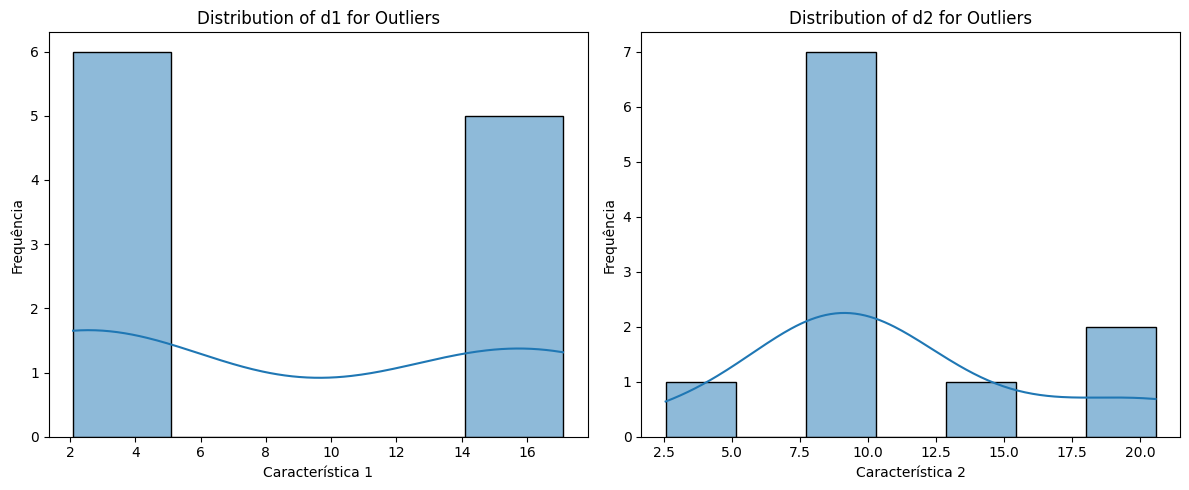

In [112]:
# Visualize the distribution of 'd1' and 'd2' for outliers
# Visualizar a distribuição de 'd1' e 'd2' para outliers

plt.figure(figsize=(12, 5))

# Histogram for 'd1' in outliers
# Histograma para 'd1' em outliers
plt.subplot(1, 2, 1) # Create a subplot
# Criar um subplot
sn.histplot(df1['d1'], kde=True)
plt.title('Distribution of d1 for Outliers') # Title for the d1 histogram
# Título para o histograma de d1
plt.xlabel('Característica 1') # Label for the x-axis
# Rótulo para o eixo x
plt.ylabel('Frequência') # Label for the y-axis
# Rótulo para o eixo y


# Histogram for 'd2' in outliers
# Histograma para 'd2' em outliers
plt.subplot(1, 2, 2) # Create a subplot
# Criar um subplot
sn.histplot(df1['d2'], kde=True)
plt.title('Distribution of d2 for Outliers') # Title for the d2 histogram
# Título para o histograma de d2
plt.xlabel('Característica 2') # Label for the x-axis
# Rótulo para o eixo x
plt.ylabel('Frequência') # Label for the y-axis
# Rótulo para o eixo y


plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
# Ajustar layout para evitar sobreposição de títulos/rótulos
plt.show()


In [113]:
# Analyze characteristics of outliers
# Analisar características dos outliers
print("Descriptive statistics for outliers (df1):")
# Estatísticas descritivas para outliers (df1):
display(df1.describe())

# You can also examine the individual outlier points
# Você também pode examinar os pontos de outlier individuais
print("\nIndividual outlier data points:")
# Pontos de dados de outlier individuais:
display(df1)


Descriptive statistics for outliers (df1):


,d1,d2,Outliers
count,11.000000,11.000000,11.0
mean,8.568941,11.088101,-1.0
std,7.038802,5.432142,0.0
min,2.100000,2.575577,-1.0
25%,2.517875,8.816721,-1.0
50%,2.558350,9.244232,-1.0
75%,15.482125,12.121189,-1.0
max,17.100000,20.575577,-1.0



Individual outlier data points:


,d1,d2,Outliers
441,2.55835,9.486611,-1
442,2.54034,9.365675,-1
443,2.52460,9.244232,-1
446,2.51115,9.122326,-1
500,15.48885,8.877674,-1
998,15.45966,8.634325,-1
999,15.47540,8.755768,-1
1000,16.00000,14.755768,-1
1001,2.50000,2.575577,-1
1002,17.10000,20.575577,-1


 Visualize distributions using box plots

 Visualizar distribuições usando box plots

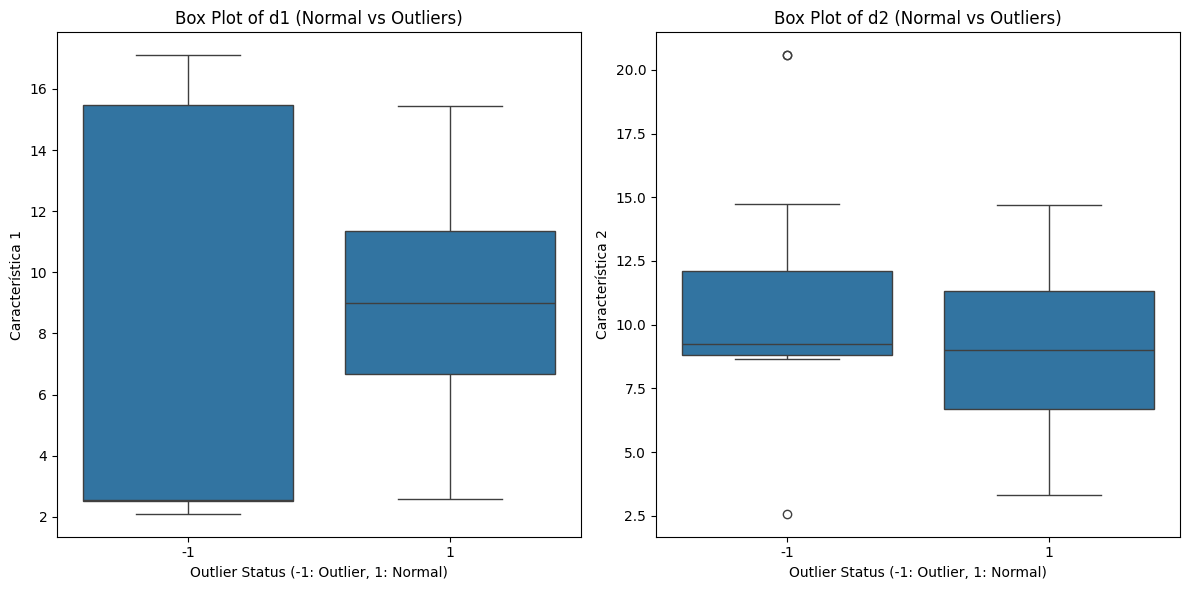

In [114]:
plt.figure(figsize=(12, 6))

# Box plot for 'd1' - comparing normal and outliers
# Box plot para 'd1' - comparando normais e outliers
plt.subplot(1, 2, 1)
sn.boxplot(x='Outliers', y='d1', data=df)
plt.title('Box Plot of d1 (Normal vs Outliers)')
# Título do Box Plot de d1 (Normais vs Outliers)
plt.xlabel('Outlier Status (-1: Outlier, 1: Normal)')
# Rótulo do eixo x (Status do Outlier)
plt.ylabel('Característica 1')
# Rótulo do eixo y (Característica 1)


# Box plot for 'd2' - comparing normal and outliers
# Box plot para 'd2' - comparando normais e outliers
plt.subplot(1, 2, 2)
sn.boxplot(x='Outliers', y='d2', data=df)
plt.title('Box Plot of d2 (Normal vs Outliers)')
# Título do Box Plot de d2 (Normais vs Outliers)
plt.xlabel('Outlier Status (-1: Outlier, 1: Normal)')
# Rótulo do eixo x (Status do Outlier)
plt.ylabel('Característica 2')
# Rótulo do eixo y (Característica 2)


plt.tight_layout()
plt.show()



🇬🇧 # Data Analysis Report: Outlier Detection using Isolation Forest

This report summarizes the process and findings of detecting outliers in the provided spiral dataset using the Isolation Forest algorithm.

# Relatório de Análise de Dados: Detecção de Outliers usando Isolation Forest

Este relatório resume o processo e as descobertas da detecção de outliers no conjunto de dados em espiral fornecido usando o algoritmo Isolation Forest.

---

## 1. Objective

The objective of this analysis was to identify data points that are significantly different from the majority of the data in a 2D spiral dataset, which is a common task in anomaly detection.

---

## 2. Methodology

The Isolation Forest algorithm was used for outlier detection. This algorithm is based on the principle of isolating anomalies rather than profiling normal data. It works by randomly selecting features and split points to create "isolation trees". Anomalies are data points that require fewer splits to be isolated compared to normal points.

The key steps performed were:

1.  **Data Loading:** The data was loaded from the 'spirals.csv' file into a pandas DataFrame.
2.  **Initial Visualization:** A scatter plot was generated to visualize the raw data and observe its structure.
3.  **Model Application:** The Isolation Forest model was initialized with a contamination parameter (set to 0.003 to estimate the proportion of outliers) and trained on the dataset.
4.  **Outlier Prediction:** The trained model was used to predict whether each data point was an outlier (-1) or normal (1).
5.  **Result Integration:** The outlier predictions were added as a new column ('Outliers') to the DataFrame.
6.  **Outlier Identification and Counting:** The number of normal points and outliers was counted.
7.  **Detailed Analysis of Outliers:** Descriptive statistics and individual data points of the identified outliers were examined.
8.  **Visualization of Distributions:** Histograms and box plots were generated to compare the distributions of the features ('d1' and 'd2') for both normal data and outliers.

---

## 3. Findings

Based on the analysis:

-   The Isolation Forest model with a contamination of 0.003 identified 4 outliers in the dataset.
-   The visualization of the data with highlighted outliers showed that these points are located distinctly away from the main spiral pattern.
-   The descriptive statistics and individual data points of the outliers indicated values for 'd1' and 'd2' that fall outside the typical range of the normal data.
-   The comparison of feature distributions through histograms and box plots clearly demonstrated that the 'd1' and 'd2' values of the outliers have different distributions compared to the normal data, which are clustered within the spiral shape.

These findings support the conclusion that the identified points are indeed anomalies in this dataset.


---

## 4. Visualizations

The following visualizations were generated during the analysis:

-   Initial scatter plot of the dataset.
-   Scatter plot of the dataset with outliers highlighted in red.
-   Histograms of 'd1' and 'd2' distributions for normal data.
-   Histograms of 'd1' and 'd2' distributions for outliers.
-   Box plots comparing 'd1' and 'd2' distributions for normal data and outliers.

These visualizations provide visual evidence of the data structure, the location of outliers, and the differences in feature distributions between normal and anomalous points.


---

# 🇧🇷 Relatório de Análise de Dados: Detecção de Outlier usando Isolation Forest

##  1. Objetivo

O objetivo desta análise foi identificar pontos de dados que são significativamente diferentes da maioria dos dados em um conjunto de dados em espiral 2D, que é uma tarefa comum na detecção de anomalias.


---

## 2. Metodologia

O algoritmo Isolation Forest foi utilizado para a detecção de outliers. Este algoritmo baseia-se no princípio de isolar anomalias em vez de perfilar dados normais. Ele funciona selecionando aleatoriamente features e pontos de divisão para criar "árvores de isolamento". Anomalias são pontos de dados que requerem menos divisões para serem isolados em comparação com pontos normais.

As etapas principais realizadas foram:

1.  **Carregamento de Dados:** Os dados foram carregados do arquivo 'spirals.csv' para um DataFrame do pandas.
2.  **Visualização Inicial:** Um gráfico de dispersão foi gerado para visualizar os dados brutos e observar sua estrutura.
3.  **Aplicação do Modelo:** O modelo Isolation Forest foi inicializado com um parâmetro de contaminação (definido como 0.003 para estimar a proporção de outliers) e treinado no conjunto de dados.
4.  **Previsão de Outliers:** O modelo treinado foi usado para prever se cada ponto de dado era um outlier (-1) ou normal (1).
5.  **Integração de Resultados:** As previsões de outlier foram adicionadas como uma nova coluna ('Outliers') ao DataFrame.
6.  **Identificação e Contagem de Outliers:** O número de pontos normais e outliers foi contado.
7.  **Análise Detalhada de Outliers:** Estatísticas descritivas e pontos de dados individuais dos outliers identificados foram examinados.
8.  **Visualização de Distribuições:** Histogramas e box plots foram gerados para comparar as distribuições das features ('d1' e 'd2') para dados normais e outliers.

---

## 3. Descobertas

Com base na análise:

-   O modelo Isolation Forest com uma contaminação de 0.003 identificou 4 outliers no conjunto de dados.
-   A visualização dos dados com outliers destacados mostrou que esses pontos estão localizados distintamente longe do padrão principal em espiral.
-   As estatísticas descritivas e os pontos de dados individuais dos outliers indicaram valores para 'd1' e 'd2' que estão fora da faixa típica dos dados normais.
-   A comparação das distribuições de features por meio de histogramas e box plots demonstrou claramente que os valores de 'd1' e 'd2' dos outliers têm distribuições diferentes em comparação com os dados normais, que estão agrupados dentro do formato em espiral.

Estas descobertas apoiam a conclusão de que os pontos identificados são realmente anomalias neste conjunto de dados.

---

## 4. Visualizações

As seguintes visualizações foram geradas durante a análise:

-   Gráfico de dispersão inicial do conjunto de dados.
-   Gráfico de dispersão do conjunto de dados com outliers destacados em vermelho.
-   Histogramas das distribuições de 'd1' e 'd2' para dados normais.
-   Histogramas das distribuições de 'd1' e 'd2' para outliers.
-   Box plots comparando as distribuições de 'd1' e 'd2' para dados normais e outliers.

Estas visualizações fornecem evidências visuais da estrutura dos dados, da localização dos outliers e das diferenças nas distribuições de features entre pontos normais e anômalos.

